In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

#from google.colab import drive
# Esto te va a solicitar autorizacion para acceder a tu Drive. 
# Entra al link y acepta los permisos. Copia la clave suministrada y pegalo donde te lo solicita
#drive.mount('/content/drive')

#%cd drive/My\ Drive/  #Elegir ubicacion
#%pwd #verifica la ubicacion

Analisis de las imagenes usando fft


'\nplt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Recontruccion del espectro")\nplt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Imagen procesada")\n'

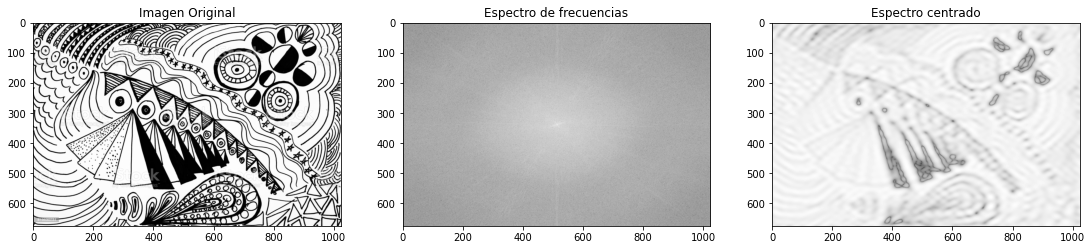

In [ ]:
#Abrir la imagen
img_c1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TP3/01.jpg", 0)

#Graficar el espectro de las frecuencias de img_c1, 
#¿Cual es la funcion adecuada para aplicar en una archivo de imagen?
f = np.fft.fft2(img_c1)
fshift = np.fft.fftshift(f) 
img_c2 =  20*np.log(np.abs(fshift))


dft = cv2.dft(np.float32(img_c1),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img_c2.shape
crow,ccol = int(rows/2) , int(cols/2)


# Crea la máscara primero, el centro del cuadrado vale 1, el resto son ceros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
 
# Aplica la máscara y la DFT inversa
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_c3 = cv2.idft(f_ishift)
img_c3 = cv2.magnitude(img_c3[:,:,0],img_c3[:,:,1])

#Centrar el espectro de las frecuencias
#img_c3 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TP3/03.jpg", 0)

#Recontruya el espectro original de frecuencias
img_c4 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TP3/04.jpg", 0)
#Recontruya la imagen a partir del espectro de frecuencias obtenido
img_c5 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TP3/05.jpg", 0)



#Graficas de los resultados obtenidos

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Imagen Original")

plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Espectro de frecuencias")

plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Espectro centrado")
"""
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Recontruccion del espectro")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Imagen procesada")
"""






#Respuestas



*   a) El metodo CV2.imread lo que hace es cargar una imagen de un archivo especifico. Si no se puede leer esa imagen entonces el metodo devuelve una matriz vacia. 
*   Elemento de lista





Funciones para aplicar filtros en las imagenes


In [ ]:
def distancia(p1,p2):
    return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

#Explique como funciona el filtro pasa-bajo
def FiltroPasaBajo(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base


#Implemente el filtro pasa-alto
def FiltroPasaAlto(D0,imgShape):
    pass